## **Name:** First Last

## **Computing ID:** ID

In [1]:
# Setup dependencies
import numpy as np
import time
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
from PIL import Image

#!pip install transformers
from transformers import pipeline

# Lab 5: Deep Learning (100 Points)

## **Due December 12th, 2025 at 11:59PM EST**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/13k680SlcyD4xk2Rm_Bv_FuY6atq7IZRX?usp=sharing) 

In this lab, you'll explore several core applications of deep learning across both computer vision and natural language processing. These tasks represent some of the most widely used and rapidly evolving AI techniques and model strategies used in industry, research, and everyday products you already use.

This lab is structured around four practical model tasks, most of which we have covered briefly in class. These pretrained model interpret and detect in images, predict human movement, and can also generate or translate text.

Even though these models are pretrained, their goal is to help you explore these systems at a high level and their limitations. Happy trails!


![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/3_what-is-deep-learning.png)

# **Part 1: Object Detection (20 points)**

Object detection models locate and classify objects within an image.
In this lab, you will run a pretrained detector on a real image and visualize the results. These models sit at the core of applications like self-driving cars, traffic monitoring, robotics, and retail analytics.

In [6]:
%%capture
!pip install ultralytics
from ultralytics import YOLO

**Change the image path below, run the object detection model,  and answer the text prompts below.**

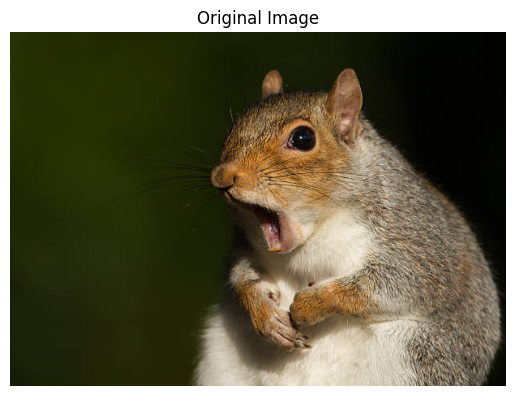

In [7]:
# Load image
img_path = "squirrel.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [12]:
# Load pretrained YOLO model
model_img = YOLO("yolov8l.pt")  # tiny model for speed

In [16]:
print("Running YOLOv8-L detection...")

for _ in tqdm(range(40)):
    import time; time.sleep(0.02)

results = model_img(img_path)
r = results[0]

Running YOLOv8-L detection...


100%|██████████| 40/40 [00:00<00:00, 46.96it/s]



image 1/1 /content/squirrel.jpg: 480x640 1 cat, 8537.6ms
Speed: 4.3ms preprocess, 8537.6ms inference, 26.7ms postprocess per image at shape (1, 3, 480, 640)


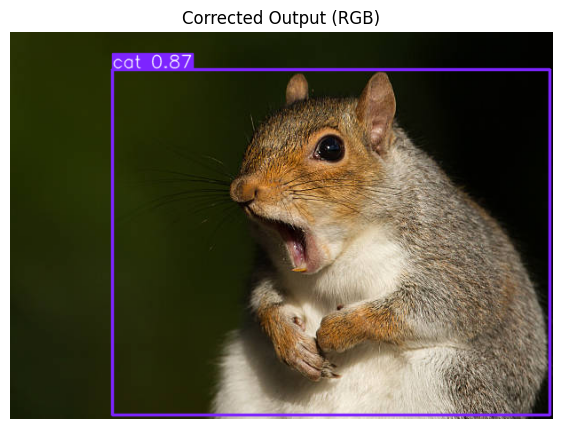

In [18]:
# Convert to RGB for correct display
raw_plot = r.plot()
rgb_plot = cv2.cvtColor(raw_plot, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(7,7))
plt.imshow(rgb_plot)
plt.axis("off")
plt.title("Corrected Output (RGB)")
plt.show()

**Question 1 (10 points): Hypothesize at least 5 reasons (5+) that an object detection algorithm might fail. For example, occlusion (an object being partially or fully covered/obscured) is a common entry level failure point. What other ones can you think of?**


1.   List item
2.   List item
3.   List item
4. List item
5. List Item



**Question 2 (10 points): UVA now uses AI-assisted license plate scanners for parking and campus monitoring (boo). License plates uniquely identify individuals over time, even when drivers never consented to being tracked.**

**Do you think it is fair to use AI assisted scanners for these enforcement jobs (parking and ticketing) that have traditionally been done manually? What are some privacy risks (ie: data sharing) that you can think of? In 3 to 4 sentences, describe.**

**If you have a Ring camera, you are part of the Flock: https://www.cnet.com/home/security/amazons-ring-cameras-push-deeper-into-police-and-government-surveillance/**

**Additional reference: https://www.aclu-wy.org/news/surveillance-company-flock-now-using-ai-report-us-police-if-it-thinks-our-movement-patterns-are/**

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRic1JxJkDW-7H3vaxQ7hyJK-qzg63wQav1QQ&s)

I do/do not think it is fair...

# **Part 2: Image Segmentation (10 points)**

Semantic segmentation assigns each pixel in an image to a class (ie: sky, road, person, car). Unlike object detection, segmentation provides a much richer understanding of scene structure. Segmentation problems are essential for autonomous driving, robotics, medical imaging, agriculture, and scene understanding tasks.

In [49]:
seg = pipeline("image-segmentation", model="nvidia/segformer-b0-finetuned-ade-512-512")

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:417: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'reduce_labels'
  image_processor = cls(**image_processor_dict)
Device set to use cpu


**Change the image path below, run the segmentation model,  and answer the text prompts below.**

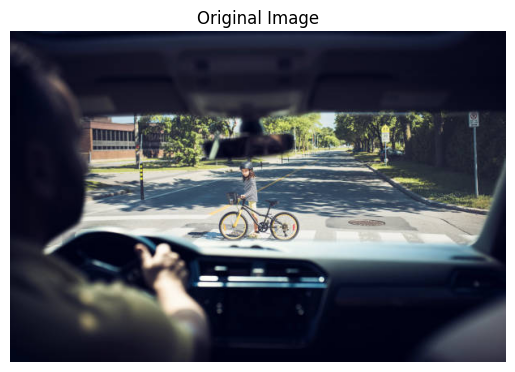

In [50]:
# Load image
img_path = "car.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [51]:
img = Image.open(img_path)
result = seg(img)

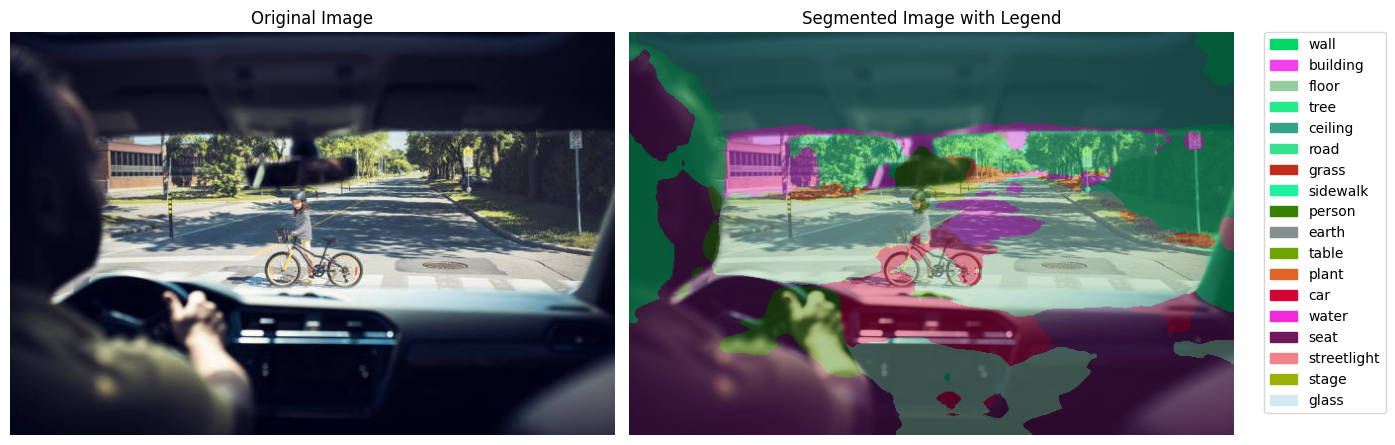

In [52]:
# Assign a unique color to each class
img_np = np.array(img)
num_classes = len(result)
colors = np.random.randint(0, 255, size=(num_classes, 3), dtype=np.uint8)

# Create overlay
overlay = img_np.copy()
legend_patches = []

for i, segment in enumerate(result):
    label = segment["label"]
    mask = np.array(segment["mask"]) > 0

    color = colors[i]
    overlay[mask] = (0.6 * img_np[mask] + 0.4 * color).astype(np.uint8)

    # Add to legend
    patch = mpatches.Patch(color=color/255.0, label=label)
    legend_patches.append(patch)


plt.figure(figsize=(14,6))

# Original image
plt.subplot(1,2,1)
plt.imshow(img_np)
plt.title("Original Image")
plt.axis("off")

# Segmented overlay
plt.subplot(1,2,2)
plt.imshow(overlay)
plt.title("Segmented Image with Legend")
plt.axis("off")

# Legend outside the plot
plt.legend(handles=legend_patches, loc="upper left", bbox_to_anchor=(1.05,1), borderaxespad=0.)

plt.tight_layout()
plt.show()

**Question 1 (10 points): Companies like Tesla have famously attempted to solve autonomous driving using vision-only systems, removing radar and lidar sensors. Critics argue that relying solely on segmentation and object detection from cameras has contributed to avoidable accidents and fatalities.**

**Reflect in 3 to 4 sentences. What are the advantages and limitations of vision-only autonomous driving compared to using multiple sensors (camera + lidar + radar)? Given your current results, would YOU feel comfortable in a car with self-driving capabilities that relied only on vision models like the ones you used in Parts 1 and 2?**


Yes/No, I would because...



# **Part 3: Pose Estimation (20 points)**

Pose estimation identifies keypoints on the human body (ie: elbows, hips, knees) and reconstructs the overall skeleton of a person in an image. These models are widely used in sports analytics, healthcare, physical therapy, gaming, ergonomics, and movement analysis.

![](https://ars.els-cdn.com/content/image/1-s2.0-S092658052100279X-gr13.jpg)

In [14]:
%%capture
!pip install mediapipe
import mediapipe as mp

mp_pose = mp.solutions.pose

**Change the image below to a new input that ideally contains one or more unobstructed humans.**

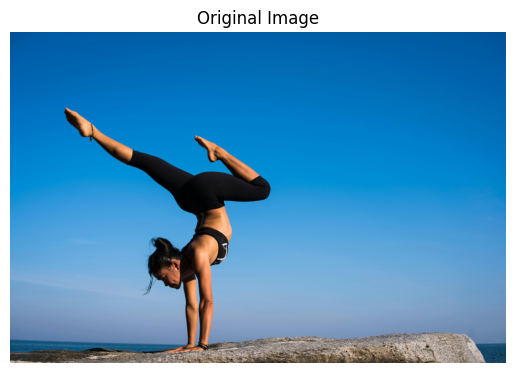

In [15]:
# Load image
img_path = "yoga.jpg"
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

**Pass your input to Google's Pose Estimation solution, MediaPipe.**

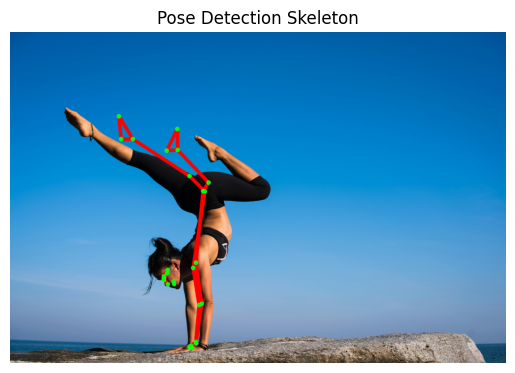

In [16]:
# Run pose model
with mp_pose.Pose(static_image_mode=True) as pose:
    result = pose.process(img_rgb)

# Draw keypoints
mp_drawing = mp.solutions.drawing_utils
landmark_style = mp_drawing.DrawingSpec(color=(0,255,0), thickness=40, circle_radius=5)
connection_style = mp_drawing.DrawingSpec(color=(255,0,0), thickness=40)

annotated = img_rgb.copy()

mp_drawing.draw_landmarks(
    annotated,
    result.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    landmark_style,
    connection_style
)

plt.imshow(annotated)
plt.title("Pose Detection Skeleton")
plt.axis("off")
plt.show()

**Question 1 (10 points): Pose estimation is widely used for fitness tracking, physical therapy, sports analytics, workplace monitoring, and even security applications. But, these systems analyze human bodies at large scales, often without consent.**

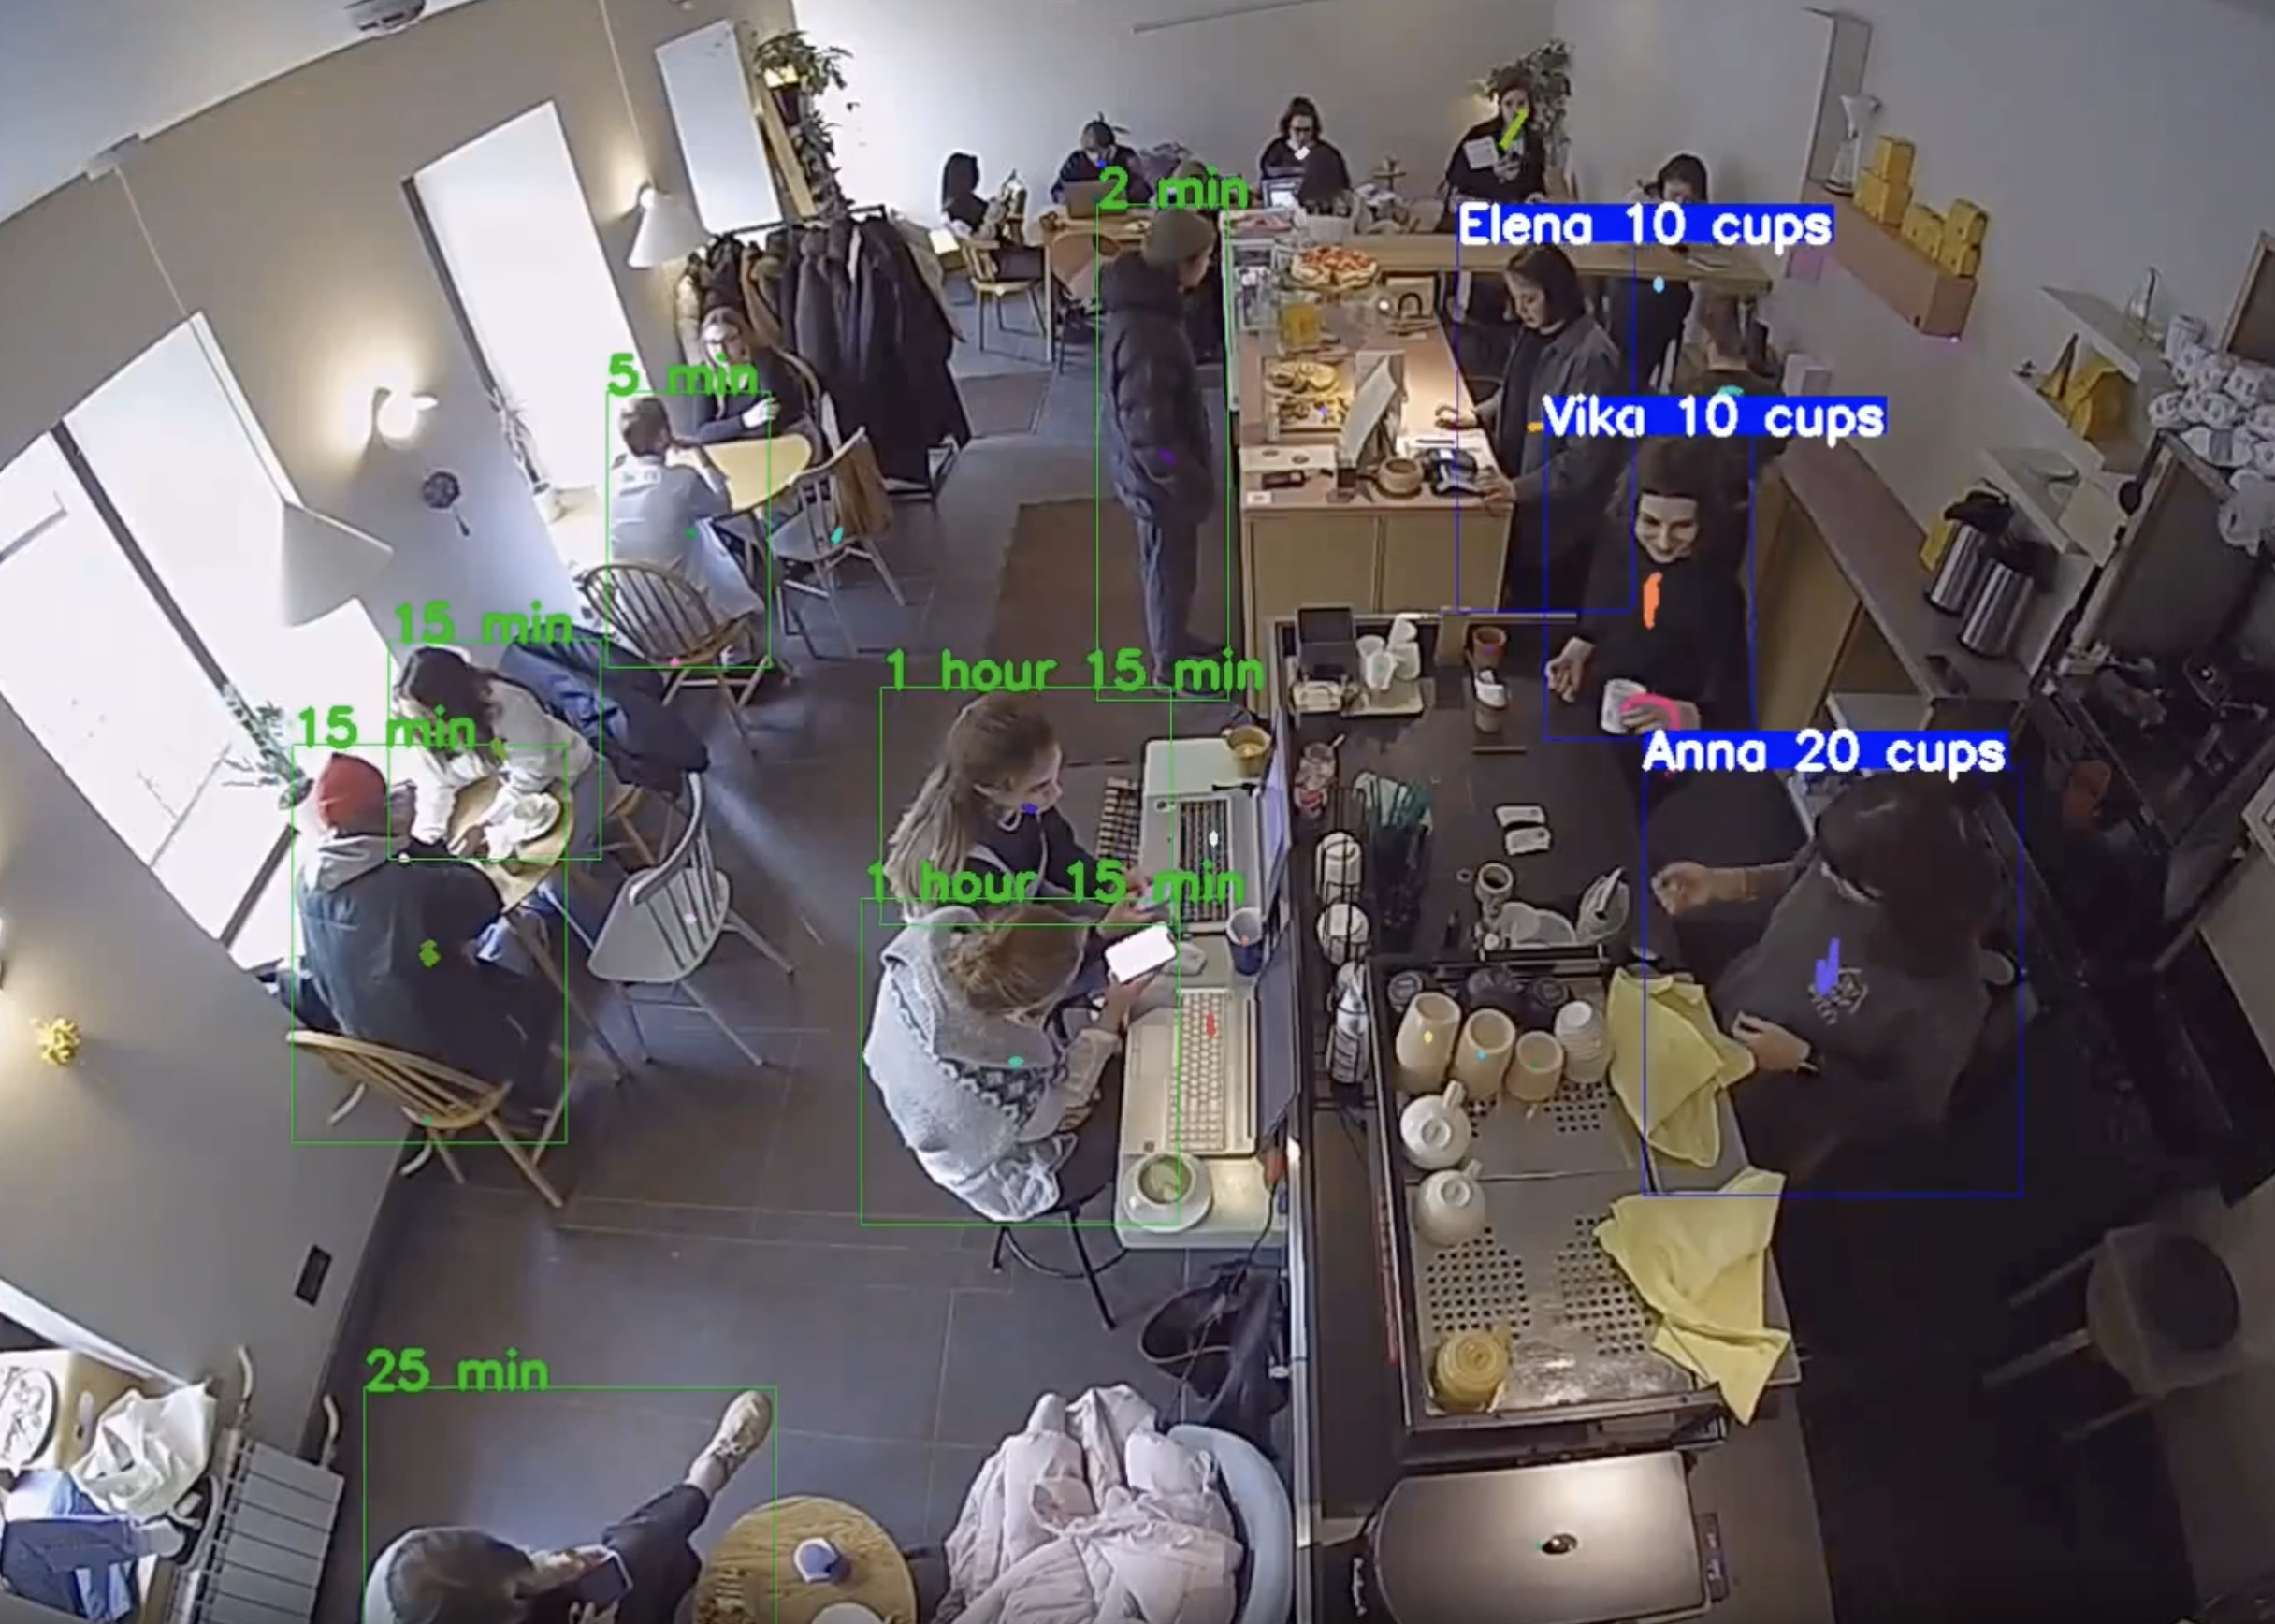

**Should companies be allowed to track posture or productivity using body-tracking AI? Do you think there is nuance if it is an employee vs. a non-employee? Or a physically risky job (ie: construction) vs. a stationary job? Write 2 to 3 sentences.**

**Also see this visual: https://www.youtube.com/watch?v=ZZvSJKw6z8Y**

Pose estimation shoud/should not...



**Question 2 (10 points): How might pose estimation be applied to animals or non-humans? Write 2 to 3 sentences.**

**Example here: https://www.youtube.com/watch?v=J9BsEmY3NFw**


Pose estimation on non-humans like animals or robots can be applied to...



# **Part 4: Text Generation + Translation (20 points)**

Text generation using a pretrained GPT (generative pretrained transformer) style model intakes prompts and generates free-form text for a wide variety of applications. Machine translation, an application of GPT models, foundational in global communication, web accessibility, international business, and multilingual technology.

**Change the below prompt for part 4 of the lab. You will use GPT-2 to expand your initial prompt using text generation.**

In [2]:
prompt = "Once upon a midnight dreary, while I pondered, weak and weary, Over many a quaint and curious volume of forgotten lore."

**Pick one of the translator pipelines below and set the final translator variable equal to your selected language task.**

In [3]:
'''
-----------------------------------------------
     Translator Model with T5 (Pick One)
-----------------------------------------------
'''

'''
# English → French
translator_fr = pipeline(
    "translation_en_to_fr",
    model="Helsinki-NLP/opus-mt-en-fr"
)

# English → Spanish
translator_es = pipeline(
    "translation_en_to_es",
    model="Helsinki-NLP/opus-mt-en-es"
)

# English → German
translator_de = pipeline(
    "translation_en_to_de",
    model="Helsinki-NLP/opus-mt-en-de"
)

# English → Japanese
translator_ja = pipeline(
    "translation_en_to_ja",
    model="Helsinki-NLP/opus-mt-en-jap"
)

# English → Arabic
translator_ar = pipeline(
    "translation_en_to_ar",
    model="Helsinki-NLP/opus-mt-en-ar"
)

# English → Hindi
translator_hi = pipeline(
    "translation_en_to_hi",
    model="Helsinki-NLP/opus-mt-en-hi"
)
'''

# English → Chinese
translator_zh = pipeline(
    "translation_en_to_zh",
    model="Helsinki-NLP/opus-mt-en-zh"
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/806k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


In [4]:
translator = translator_zh

In [5]:
# Translate Text
translated = translator(prompt)[0]["translation_text"]
print("\nHF Translation:\n", translated)


HF Translation:
 很久以前的午夜,一个沉闷的午夜, 我沉思,虚弱和疲倦, 超过许多奇异和好奇的 被遗忘的传说。


**Finally, pass your expanded prompt to Google Translate and observe if the output is similar. Say hello to our old friend, the API!**

In [6]:
%%capture
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

translator = Translator()

In [10]:
detection = translator.detect(translated)
print("Detected language:", detection.lang)
back_to_english = translator.translate(translated, dest="en").text

Detected language: zh-CN


In [11]:
prompt

'Once upon a midnight dreary, while I pondered, weak and weary, Over many a quaint and curious volume of forgotten lore.'

In [12]:
translated

'很久以前的午夜,一个沉闷的午夜, 我沉思,虚弱和疲倦, 超过许多奇异和好奇的 被遗忘的传说。'

In [13]:
back_to_english

'At midnight long ago, a dreary midnight, I brooded, weak and tired, over many strange and curious forgotten legends.'

**Question 1 (10 points): Machine translation is used worldwide for healthcare, immigration, emergency response, legal documents, and international communication. Errors can cause misunderstandings, bias, or differences in outcomes (especially for minority or low-resource languages).**



![](https://1.bp.blogspot.com/-TAEq5oc14jQ/V-qWTeqaA7I/AAAAAAAABPo/IEmOBO6x7nIkzLqomgk_DwVtzvpEtJF1QCLcB/s1600/img3.png)


**Should critical institutions (hospitals, courts, schools) rely on machine translation without a human in the loop? Is there nuance (ie: rare languages or dialects rarely learned in the West, no human speaker available)? Write 2 to 3 sentences.**

Machine translation should/should not..

**Question 2 (10 points): Machine translation can influence whose language dominates international communication. Big tech platforms and AI models often perform best for widely spoken languages and poorly for under-resourced ones. Do you think translation models reinforce global power imbalances and/or do you think they provide an opportunity for low-resource languages? Write 2 to 3 sentences.**

**Reference: https://news.stanford.edu/stories/2025/05/digital-divide-ai-llms-exclusion-non-english-speakers-research**

I think machine translation does/does not reinforce the idea of a dominant language. This is because...



# **Part 5: Reflection (30 points)**

**Question 1 (10 points): After working through multiple deep learning tasks (object detection, segmentation, pose estimation, text generation, translation, audio, etc...), which task resonated with you the most and why? Do you find deep learning with text or images more exciting (or do you have no preference)?**

**What did you find surprising or challenging about seeing these models work in real time? Write 2 to 3 sentences.**

I am most excited by...

**Question 2 (10 points): Which deep learning skill or model from the class do you think will be most useful for your future career? How might you apply it (or a more advanced version) to a real problem you care about?**

**What skills do you anticipate growing to prepare for that? Write 2 to 3 sentences.**

I think [task] will be most relevant for a career in...



**Question 3 (10 points): Finally, are there any problems you firmly believe should not be handled or solved with AI?**

**For example:**
*  Hiring and firing (https://www.hrdive.com/news/cvs-settles-lawsuit-over-using-ai-based-lie-detector/722249/)
*  AI art (https://apnews.com/article/studio-ghibli-chatgpt-images-hayao-miyazaki-openai-0f4cb487ec3042dd5b43ad47879b91f4)
*  AI "influencers (https://www.vice.com/en/article/ai-influencers-are-raking-in-millions-while-youre-struggling-to-pay-bills/)
* AI grading assignments (https://www.edweek.org/technology/is-it-ethical-to-use-ai-to-grade/2025/02)
* AI content review (https://www.npr.org/2025/05/31/nx-s1-5407870/meta-ai-facebook-instagram-risks)

**Pick one or 2 use cases from above (or your own choosing) and write 2 to 3 sentences why you are against AI intervention.**

I am strongly against AI being used for...



# **Resume Drop**

If you would like to be considered for internal referrals at Microsoft Azure and Meta, please attach your resume (in .pdf format) to your Canvas submission. There is a brief space to put any final comments below.

**Any comments to attach to referral? For example, do you want to provide alternative contact information, visa/work restrictions, or existing clearances?**

[Comments Here]

### Honor Pledge

On my honor as a student, I have neither given nor received unauthorized aid on this assignment.